In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linalg

%matplotlib inline

#Data paths
path = 'd00.dat'
path1 = 'd00_te.dat'

#Load from a file to create a control limit
file = pd.DataFrame(np.loadtxt(path)).T

## PCA Calculations

In [2]:
#Calculation of the averages
averages = file.mean()

#Calculation of the standard deviations
desv_pad = file.std()

In [3]:
#Normalizing the data to balance variances
file_norm = file.copy()

for i in file_norm:
    file_norm[i] = (file_norm[i]-averages[i])/desv_pad[i]
    
file_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,-0.044401,-0.653661,0.885207,-0.861360,1.400405,-0.410481,-0.227496,0.960375,0.03002,0.197452,...,-0.908680,-0.004696,0.795260,-0.068298,-0.248827,1.211723,1.575293,-0.023624,-0.003330,0.090802
1,0.001481,0.975980,0.071957,-0.799933,0.810940,1.797914,0.000494,-0.675350,0.56609,-0.170456,...,-0.186296,-0.050358,-0.013818,-0.670200,0.116256,-1.347466,-0.752507,-0.009022,0.396246,1.085388
2,0.024947,0.623204,-0.208583,1.512065,0.379625,-0.424057,-0.037504,-1.267921,1.10216,0.001520,...,0.061513,-0.070888,-0.666817,-1.479989,-0.054811,1.754909,-0.204315,0.053153,0.809141,1.485239
3,0.011638,-0.300884,0.642493,0.024754,0.360455,1.435882,0.171487,0.950909,-0.50605,-0.109709,...,-0.695939,-0.057791,0.146479,0.173430,0.055062,-0.105333,-1.108344,0.068226,0.360094,0.908648
4,-0.352618,-1.068876,0.488038,-0.048436,0.638414,0.820428,0.038492,0.657463,-1.04212,0.923857,...,-1.745617,-0.246810,-0.456743,0.613375,0.612074,-1.327750,0.647061,0.058334,-0.277325,-0.774757


In [4]:
#Calculation of the covariance matrix
cov_matx = file_norm.cov()
cov_matx.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,1.000000,-0.053143,0.087308,-0.125095,-0.034186,0.096849,0.037762,-0.000808,0.033830,-0.095712,...,-0.157492,0.996026,0.011927,-0.168890,-0.073512,-0.016769,-0.067947,0.019396,-0.008225,0.030122
1,-0.053143,1.000000,-0.080170,0.002743,-0.029287,0.089881,0.040008,0.033844,0.306023,0.029428,...,0.039268,-0.050384,0.031489,-0.017904,0.023872,-0.033287,-0.005640,-0.004802,0.263422,0.015172
2,0.087308,-0.080170,1.000000,-0.064671,0.008701,0.017448,0.172244,0.023339,-0.038357,-0.035725,...,0.122340,0.085266,0.035843,0.076345,-0.021281,-0.009332,-0.045860,-0.108795,0.004047,0.031235
3,-0.125095,0.002743,-0.064671,1.000000,-0.019997,0.000929,0.144486,-0.059398,0.061911,0.055488,...,-0.052638,-0.123406,-0.268673,0.136402,0.028164,-0.042984,0.057462,0.090396,0.062539,0.008467
4,-0.034186,-0.029287,0.008701,-0.019997,1.000000,-0.070870,0.005314,0.041767,-0.003187,0.004439,...,-0.009292,-0.032946,-0.014366,0.193271,0.000694,0.031186,-0.024664,-0.023938,0.002518,0.032227


In [5]:
#Eigenvalues and eigenvectors, disordered of the covariance matrix
auto_val, auto_vet = linalg.eig(cov_matx)

#Total variability
total_var = auto_val.sum()
auto_val, auto_vet

(array([6.60744438e+00+0.j, 3.93323628e+00+0.j, 2.80935503e+00+0.j,
        2.33132861e+00+0.j, 2.19472439e+00+0.j, 2.08346458e+00+0.j,
        1.93404945e+00+0.j, 1.73451928e+00+0.j, 1.62614994e+00+0.j,
        1.50266333e+00+0.j, 1.40347239e+00+0.j, 1.28702998e+00+0.j,
        1.25481303e+00+0.j, 1.22652047e+00+0.j, 1.19460639e+00+0.j,
        1.12156103e+00+0.j, 1.07244796e+00+0.j, 1.05304280e+00+0.j,
        9.94682043e-01+0.j, 9.61477795e-01+0.j, 9.36017944e-01+0.j,
        8.96243624e-01+0.j, 8.74467422e-01+0.j, 2.13160863e-01+0.j,
        8.29732991e-01+0.j, 8.10779540e-01+0.j, 2.84436618e-01+0.j,
        3.36627879e-01+0.j, 7.64501204e-01+0.j, 7.71762702e-01+0.j,
        3.90905573e-01+0.j, 7.20527305e-01+0.j, 6.97765167e-01+0.j,
        4.43360347e-01+0.j, 4.51107062e-01+0.j, 4.91617086e-01+0.j,
        5.22560458e-01+0.j, 6.60936436e-01+0.j, 6.31249365e-01+0.j,
        5.81702307e-01+0.j, 5.79897774e-01+0.j, 6.10960969e-01+0.j,
        7.97975962e-02+0.j, 4.62961552e-02+0.j, 

In [6]:
#Organizing the eigenvalues
##argsort() retrieves an array with eigenvalue indices so that they are,
##arranged in ascending order, order is reversed with [::-1]
idx = auto_val.argsort()[::-1]

##Reorganizing the vector of eigenvalues and eigenvectors
auto_val = auto_val[idx]
auto_vet = auto_vet[:,idx]
auto_val, auto_vet

(array([6.60744438e+00+0.j, 3.93323628e+00+0.j, 2.80935503e+00+0.j,
        2.33132861e+00+0.j, 2.19472439e+00+0.j, 2.08346458e+00+0.j,
        1.93404945e+00+0.j, 1.73451928e+00+0.j, 1.62614994e+00+0.j,
        1.50266333e+00+0.j, 1.40347239e+00+0.j, 1.28702998e+00+0.j,
        1.25481303e+00+0.j, 1.22652047e+00+0.j, 1.19460639e+00+0.j,
        1.12156103e+00+0.j, 1.07244796e+00+0.j, 1.05304280e+00+0.j,
        9.94682043e-01+0.j, 9.61477795e-01+0.j, 9.36017944e-01+0.j,
        8.96243624e-01+0.j, 8.74467422e-01+0.j, 8.29732991e-01+0.j,
        8.10779540e-01+0.j, 7.71762702e-01+0.j, 7.64501204e-01+0.j,
        7.20527305e-01+0.j, 6.97765167e-01+0.j, 6.60936436e-01+0.j,
        6.31249365e-01+0.j, 6.10960969e-01+0.j, 5.81702307e-01+0.j,
        5.79897774e-01+0.j, 5.22560458e-01+0.j, 4.91617086e-01+0.j,
        4.51107062e-01+0.j, 4.43360347e-01+0.j, 3.90905573e-01+0.j,
        3.36627879e-01+0.j, 2.84436618e-01+0.j, 2.13160863e-01+0.j,
        7.97975962e-02+0.j, 4.62961552e-02+0.j, 

In [7]:
#Determination of the number of the eigenvectors (main components)

##Variability that the PCA wants to explain
var_exp = 0.55

##Variability explained by the PCA model
pca_var = 0

##Counter of the number of the eigenvalues, whose sum results 
##in the variability are explained by the PCA model

k = 0

for v in (auto_val/total_var):
    if pca_var < var_exp:
        pca_var += v
        k += 1
   
print(pca_var , k)

(0.5662968774464168+0j) 12


In [8]:
#Determination of the matrix from the chosen eigenvectors
auto_vet_matx = auto_vet[:,:k]
pd.DataFrame(auto_vet_matx).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.020147,-0.130043,0.322722,0.341378,-0.173761,-0.109300,-0.232458,-0.175618,0.075228,-0.073972,-0.019257,0.113088
1,-0.043304,0.080726,0.201432,-0.282919,0.207416,-0.012425,-0.147961,-0.016737,0.159367,-0.040801,-0.100897,-0.005794
2,-0.078531,-0.039938,-0.003536,0.068262,-0.069503,0.040955,-0.008116,-0.170822,0.147699,-0.014439,-0.031828,-0.107166
3,-0.039561,0.134866,-0.048981,-0.009387,-0.004504,0.022555,-0.069127,0.117917,-0.350712,0.058633,-0.377825,0.142473
4,-0.017772,0.010568,-0.029999,-0.011481,-0.046363,0.056850,0.062207,-0.002660,-0.164355,-0.197179,0.104951,-0.263393


In [9]:
#Determination of the matrix from scores of the main components
pca_matx = pd.DataFrame(np.dot(file_norm , auto_vet_matx))
pca_matx.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.389324,-0.376349,-1.156285,-0.573847,-0.772950,-1.335586,-1.318887,-0.648729,0.036428,-0.458188,1.214514,-1.286229
1,0.296007,0.204152,2.585195,0.084934,0.607965,2.363568,0.319504,0.176160,-1.171449,0.692436,0.801259,-1.130705
2,1.407427,-0.532290,1.492117,-2.258270,-2.021969,-0.731180,0.388124,0.034379,-2.076691,1.719053,0.069406,0.579185
3,0.529524,0.065838,1.696614,-0.169174,-0.894811,0.746732,1.095781,0.013380,-0.027765,1.325123,-0.215860,-0.435222
4,-0.259884,0.965696,-0.855565,1.577553,1.051710,0.792403,-0.271149,-0.085631,-0.679807,0.583123,-0.766042,-1.034184


## T2 Calculations

In [10]:
#Loading the second database of the normal operation
file2 = pd.DataFrame(np.loadtxt(path1))
file2.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0.24889,3702.3,4502.7,9.4170,26.996,42.183,2705.2,75.173,120.40,0.33611,...,54.059,24.804,63.269,21.950,40.188,39.461,47.000,47.594,41.384,18.905
1,0.24904,3666.2,4526.0,9.2682,26.710,42.332,2705.5,74.411,120.41,0.33676,...,53.781,24.790,62.171,22.239,40.108,43.710,46.128,47.508,41.658,18.976
2,0.25034,3673.3,4501.3,9.4212,26.842,42.360,2705.3,75.125,120.41,0.33739,...,54.075,24.669,61.585,22.191,40.030,39.480,44.121,47.612,41.721,16.562
3,0.25109,3657.8,4497.8,9.3792,26.528,41.982,2707.3,73.992,120.38,0.33664,...,54.117,24.595,61.561,21.959,40.121,32.848,45.858,47.459,40.836,20.094
4,0.24563,3698.0,4537.4,9.3746,26.736,42.354,2705.3,75.283,120.42,0.32521,...,53.906,24.451,61.388,22.271,39.538,36.682,45.753,47.458,41.727,18.330


In [11]:
#Normalizing the data to balance variances
file2_norm = file2.copy()

for i in file2_norm:
    file2_norm[i] = (file2_norm[i]-averages[i])/desv_pad[i]
    
file2_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,-0.078726,1.210124,-0.277930,0.950076,0.422756,-0.704632,-0.037504,0.356444,0.03002,-0.126821,...,0.124633,0.029285,1.642302,-0.730632,0.073837,0.385605,0.206723,0.062573,0.550368,0.463100
1,-0.073472,0.083112,0.456517,-0.994669,-0.947869,-0.030347,0.019493,-1.086174,0.56609,-0.071206,...,-0.525279,0.024330,0.715955,-0.032039,0.018205,1.781855,-0.163551,0.022066,1.071719,0.510813
2,-0.027940,0.304768,-0.322060,1.004968,-0.315273,0.096364,-0.018505,0.265570,0.56609,-0.017304,...,0.162038,-0.018500,0.221566,-0.148068,-0.036035,0.391849,-1.015775,0.071052,1.191592,-1.111439
3,-0.001671,-0.179129,-0.432384,0.456048,-1.820085,-1.614237,0.361478,-1.879425,-1.04212,-0.081474,...,0.260227,-0.044694,0.201318,-0.708877,0.027246,-1.787470,-0.278200,-0.001015,-0.492334,1.262129
4,-0.192906,1.075882,0.815860,0.395928,-0.823266,0.069211,-0.018505,0.564696,1.10216,-1.059425,...,-0.233052,-0.095665,0.055363,0.045314,-0.378171,-0.527592,-0.322785,-0.001486,1.203008,0.076689


In [12]:
#Main component matrix
pca_matx2 = pd.DataFrame(np.dot(file2_norm , auto_vet_matx))
pca_matx2.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.248419,-0.111171,0.112608,-0.744816,-0.589237,0.015378,-0.547747,-0.231284,-0.209839,-0.281063,0.521029,-0.374197
1,0.219771,-0.314852,0.489009,-1.432270,-1.547129,-1.543413,0.458725,-0.980608,0.129236,-0.215872,0.639770,0.300001
2,0.370839,0.202034,1.408385,-0.327969,1.160541,-1.085822,1.529507,-0.407484,-1.187968,0.744050,0.296890,0.810662
3,0.847076,0.365621,0.425124,0.613854,-0.460821,2.032385,-0.465346,0.869648,-0.305852,1.412494,0.459374,1.607641
4,-0.505365,0.726729,2.209690,-0.954871,1.222154,0.336813,-0.077150,0.672718,0.935958,1.202801,0.119179,-0.763029


In [13]:
#Statistical calculation of T^2

def el2(valor):
    return valor**2

T2_matx = pca_matx2.apply(el2)

for i in T2_matx:
    T2_matx[i] = T2_matx[i]/auto_val[i]
    
T2_matx

,0,1,2,3,4,5,6,7,8,9,10,11
0,(0.00933979836550647+0j),(0.003142174794540556+0j),(0.004513676977208643+0j),(0.2379545565439716+0j),(0.15819749418430254+0j),(0.0001135065831443769+0j),(0.15512881459096117+0j),(0.03083975730448195+0j),(0.027077803914681828+0j),(0.052570955495377894+0j),(0.1934283919544311+0j),(0.10879598406097603+0j)
1,(0.007309827823018061+0j),(0.025203635310830145+0j),(0.08511904831403724+0j),(0.8799259035024474+0j),(1.0906195438663984+0j),(1.143347497003345+0j),(0.10880227260968663+0j),(0.5543857308424333+0j),(0.010270865467822994+0j),(0.03101201799939934+0j),(0.29163759943573336+0j),(0.06992903412451713+0j)
2,(0.02081307770139083+0j),(0.01037761006915072+0j),(0.7060515620857167+0j),(0.04613845679711649+0j),(0.613678270100067+0j),(0.5658886714112256+0j),(1.209582018961139+0j),(0.0957284738458299+0j),(0.8678580133456546+0j),(0.36841964525001863+0j),(0.0628040533145891+0j),(0.5106114798754994+0j)
3,(0.10859546863552992+0j),(0.03398692802473205+0j),(0.06433167433095374+0j),(0.16163171144401114+0j),(0.09675748626335771+0j),(1.9825582845514749+0j),(0.11196570080645901+0j),(0.4360218463912988+0j),(0.05752566304411154+0j),(1.3277350054046924+0j),(0.15035880879538796+0j),(2.008120006183809+0j)
4,(0.03865242446387418+0j),(0.13427480338634795+0j),(1.7380249176716982+0j),(0.3910981344232168+0j),(0.6805689650517625+0j),(0.05444917833697084+0j),(0.0030775832339271485+0j),(0.260907855581065+0j),(0.5387065964152522+0j),(0.9627767548857606+0j),(0.010120368472429316+0j),(0.45237009323540356+0j)
5,(0.028662279881340482+0j),(0.07089423864612772+0j),(0.013962850466701399+0j),(0.5654834779420694+0j),(0.017668579048842194+0j),(0.14446328324342397+0j),(2.179738828801702+0j),(0.011214220884659423+0j),(4.320298978905325+0j),(1.6452964050998367+0j),(0.005906746667066029+0j),(1.6474789157972096+0j)
6,(0.05559420055818776+0j),(0.29282735525648973+0j),(0.01610601065815919+0j),(0.7154567796383899+0j),(1.1376197167137678+0j),(6.855523580737727+0j),(0.3893579006795946+0j),(0.0377603572161168+0j),(3.6945378770224075+0j),(0.055463217018983685+0j),(1.7577221211662886+0j),(0.6437185843447258+0j)
7,(0.11772929695488134+0j),(0.5247654444270198+0j),(0.2219694810178344+0j),(0.01725469136376236+0j),(2.25650814911534+0j),(0.023865556368922423+0j),(0.4299777150700757+0j),(0.17892437200195474+0j),(1.1262167349158558+0j),(0.023645172424085+0j),(0.43835149937499585+0j),(0.07958428764803639+0j)
8,(0.11222779843994894+0j),(0.08298839693933713+0j),(0.007560818290629651+0j),(0.0025816721006877677+0j),(0.04787646651477343+0j),(0.14163508429612884+0j),(2.8020094187844107+0j),(0.7951404581870695+0j),(1.1784126973514957+0j),(0.9685587149976174+0j),(0.8241000115423787+0j),(1.4423263121762266+0j)
9,(0.004151674752623375+0j),(0.0889827761198925+0j),(4.779483685174108+0j),(0.7378166452287063+0j),(2.6540878839982294+0j),(0.09115767350342137+0j),(0.05265751337997856+0j),(1.019569680134666+0j),(0.3653176357241717+0j),(1.1832176327618866+0j),(0.29648671943549626+0j),(0.7883675177515524+0j)


In [14]:
#Calculations of T2
T2 = np.array(T2_matx.sum(axis=1))

#Control limit calculations of T2-UCL
percentil_T2 = 0.99*np.shape(T2)[0]
T2_UCL = np.sort(T2)[int(percentil_T2)]
Hotlling = pd.DataFrame(T2, columns=['T2'])
Hotlling['T2 - UCL'] = T2_UCL

Hotlling.head()

,T2,T2 - UCL
0,(0.9811029147695842+0j),(31.14246696443854+0j)
1,(4.29756297629967+0j),(31.14246696443854+0j)
2,(5.077951332757397+0j),(31.14246696443854+0j)
3,(6.539588583875818+0j),(31.14246696443854+0j)
4,(5.265027675157708+0j),(31.14246696443854+0j)


In [15]:
# Calculations of the estimated X* Matrix
X_est = np.dot(pca_matx2, np.transpose(auto_vet_matx))

pd.DataFrame(X_est).head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0.022844,0.103805,0.015811,-0.202810,0.237469,-0.213682,-0.091838,0.061435,0.156640,0.127021,...,-0.077091,0.020159,0.355182,-0.089246,0.158603,0.405456,0.307093,-0.013844,0.196572,0.522567
1,0.264641,0.078717,0.073616,-0.493810,0.019124,-0.124415,-0.122445,-0.360045,0.330291,0.064332,...,0.032713,0.257356,0.559885,-0.093367,0.058378,1.793154,-0.243170,0.030323,0.438867,0.364954
2,-0.101658,0.157119,-0.415025,0.226761,-0.196071,0.050953,-0.018397,-0.602955,0.883480,0.063316,...,-0.136782,-0.101117,-0.399496,-0.085027,0.100983,0.468065,-0.924078,-0.006593,0.822179,-1.012814
3,0.175119,-0.323779,-0.322712,0.417411,-0.528822,-0.499850,-0.217340,-0.235032,0.356640,0.211811,...,-0.136624,0.174232,-0.584120,-0.080707,0.213829,-1.389943,-0.127238,0.051698,0.040901,1.011112
4,-0.174076,1.137750,-0.048919,-0.305982,-0.260280,0.396561,0.133831,0.358158,1.150771,-0.621098,...,0.084159,-0.169158,-0.096308,-0.070641,-0.557833,-0.659781,-0.337459,0.116664,1.084648,0.215500


In [16]:
# Waste R
R = file2_norm - X_est

R.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,-0.101570,1.106319,-0.293740,1.152886,0.185288,-0.490950,0.054334,0.295009,-0.126620,-0.253842,...,0.201725,0.009126,1.287120,-0.641386,-0.084766,-0.019851,-0.100370,0.076418,0.353795,-0.059467
1,-0.338113,0.004395,0.382901,-0.500860,-0.966993,0.094068,0.141938,-0.726129,0.235798,-0.135539,...,-0.557992,-0.233026,0.156070,0.061328,-0.040172,-0.011299,0.079619,-0.008257,0.632852,0.145859
2,0.073718,0.147649,0.092966,0.778207,-0.119202,0.045411,-0.000108,0.868525,-0.317390,-0.080619,...,0.298821,0.082616,0.621062,-0.063041,-0.137018,-0.076216,-0.091698,0.077645,0.369413,-0.098624
3,-0.176791,0.144650,-0.109672,0.038637,-1.291262,-1.114388,0.578819,-1.644392,-1.398759,-0.293284,...,0.396851,-0.218926,0.785438,-0.628170,-0.186583,-0.397527,-0.150961,-0.052713,-0.533235,0.251017
4,-0.018830,-0.061868,0.864779,0.701910,-0.562986,-0.327349,-0.152336,0.206537,-0.048612,-0.438327,...,-0.317211,0.073492,0.151671,0.115956,0.179662,0.132188,0.014674,-0.118150,0.118360,-0.138811


In [17]:
# Caltulations of Q
Q = np.diag(np.dot(R,np.transpose(R)))
percentil_Q = 0.99*np.shape(Q)[0]
Q_UCL = np.sort(Q)[int(percentil_Q)]
Q_Chart = pd.DataFrame(Q, columns=['Q'])
Q_Chart['Q - UCL'] = Q_UCL

Q_Chart.head()

,Q,Q - UCL
0,7.445068,49.067886
1,6.237008,49.067886
2,6.780736,49.067886
3,24.492865,49.067886
4,14.641089,49.067886


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


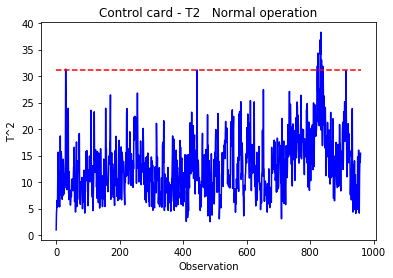

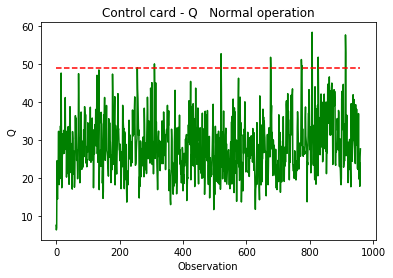

In [18]:
#Building the card of T2
chart_T2 = Hotlling.plot.line(style=['-','--'], color=['b','r'], legend = False)
plt.setp(chart_T2, xlabel = 'Observation', ylabel = 'T^2', title = 'Control card - T2   Normal operation')

#Saving the chart T2
plt.savefig('Chart_T2')

#Building the card of Q
chart_Q = Q_Chart.plot.line(style=['-','--'], color=['g','r'], legend = False)
plt.setp(chart_Q, xlabel = 'Observation', ylabel = 'Q', title = 'Control card - Q   Normal operation')

#Saving the chart Q
plt.savefig('Chart_Q')

## Failure Testing

In [19]:
files = ['d01_te.dat','d02_te.dat','d03_te.dat','d04_te.dat','d05_te.dat','d06_te.dat','d07_te.dat',
            'd08_te.dat','d09_te.dat','d10_te.dat','d11_te.dat','d12_te.dat','d13_te.dat','d14_te.dat',
            'd15_te.dat','d16_te.dat','d17_te.dat','d18_te.dat','d19_te.dat','d20_te.dat','d21_te.dat']

failures = ['Failure_01','Failure_02','Failure_03','Failure_04','Failure_05','Failure_06','Failure_07',
          'Failure_08','Failure_09','Failure_10','Failure_11','Failure_12','Failure_13','Failure_14',
          'Failure_15','Failure_16','Failure_17','Failure_18','Failure_19','Failure_20','Failure_21']

data_base_T2 = []
data_base_Q = []

detect_T2 = []
detect_Q = []

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


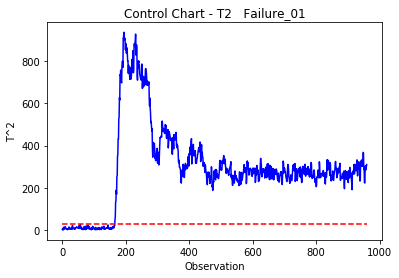

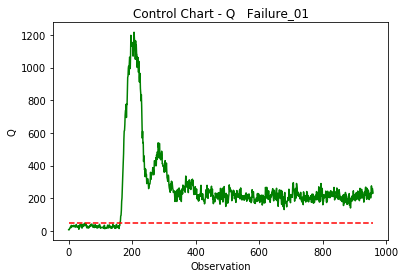

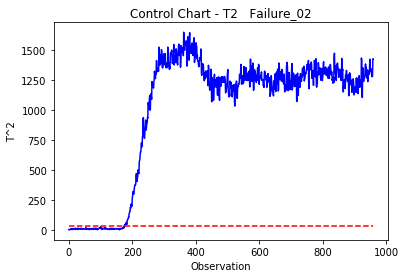

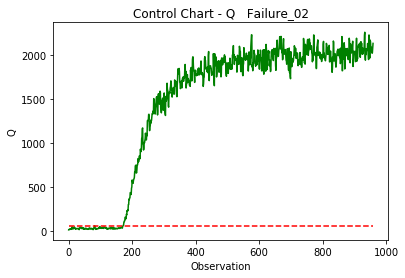

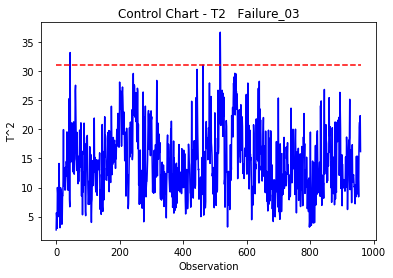

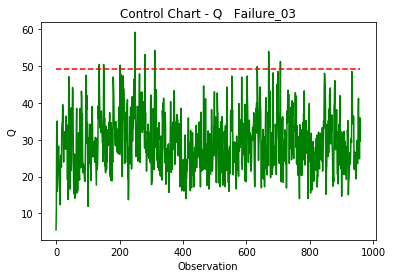

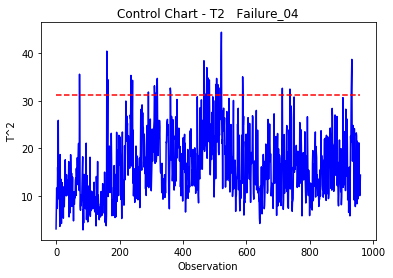

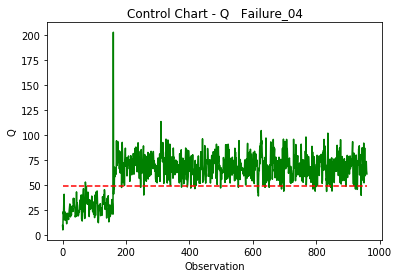

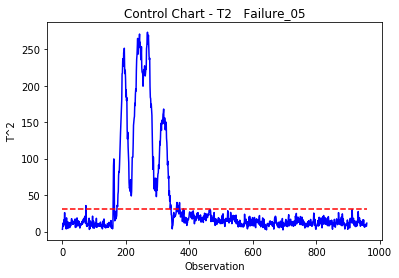

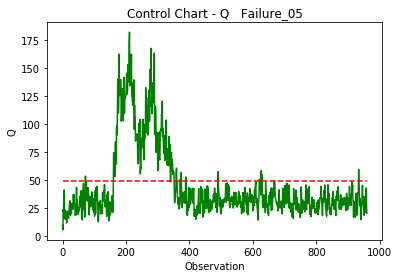

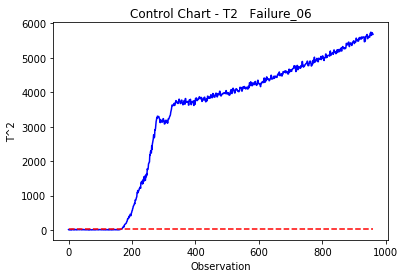

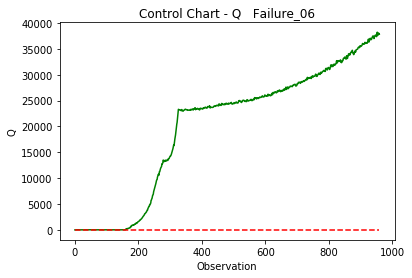

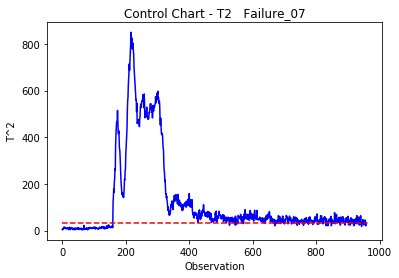

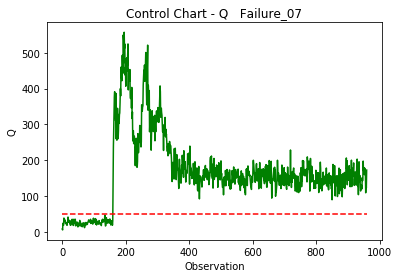

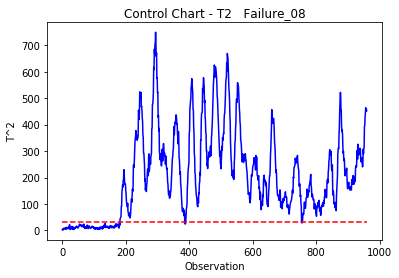

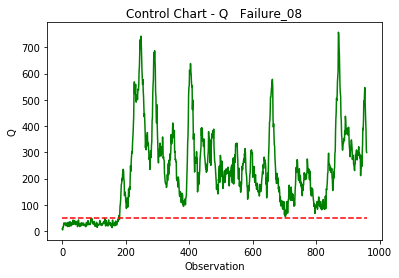

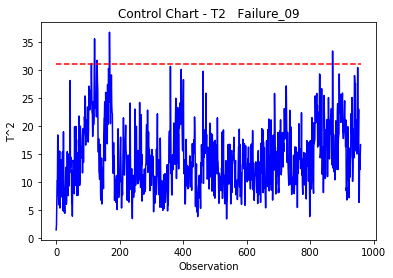

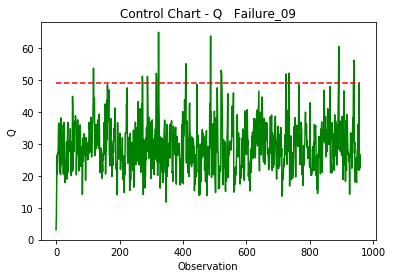

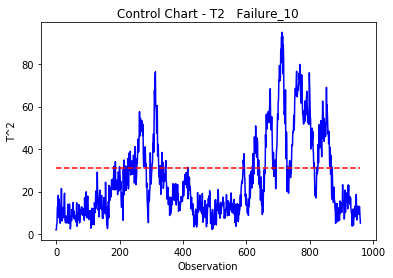

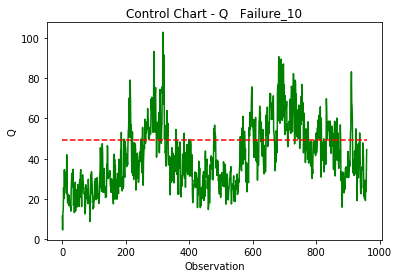

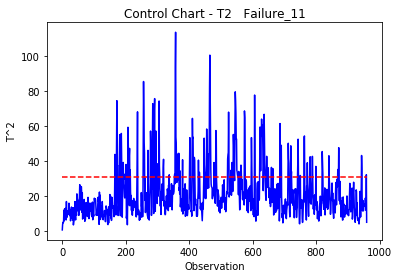

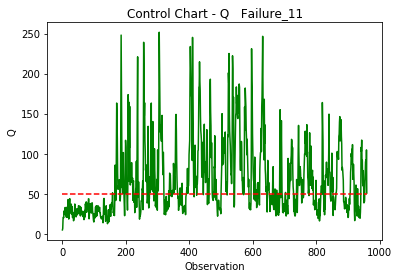

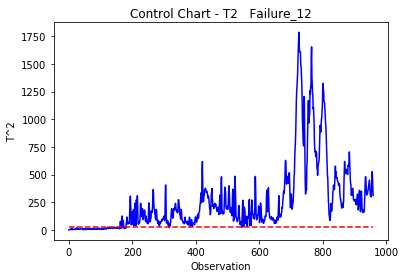

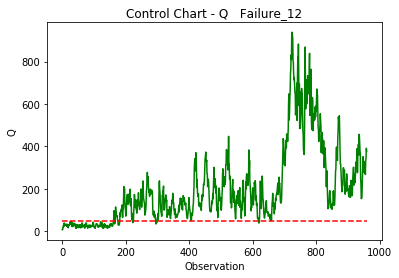

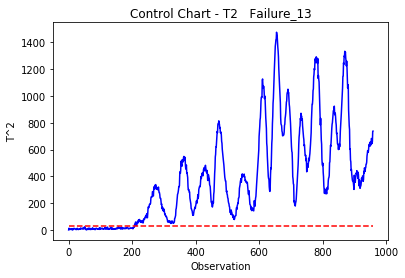

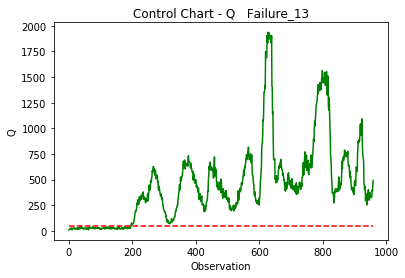

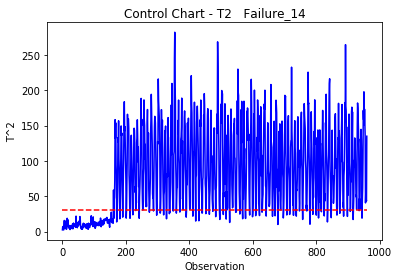

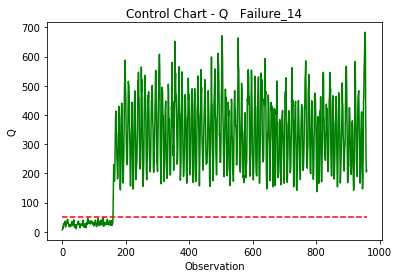

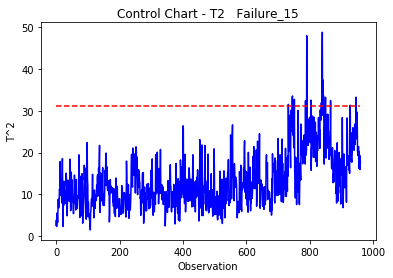

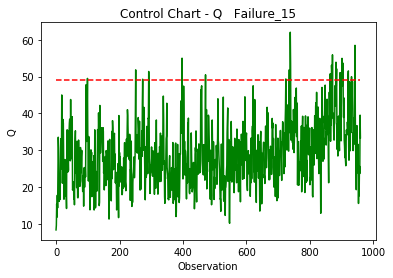

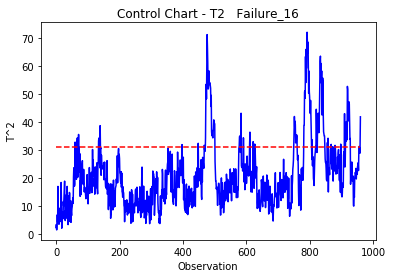

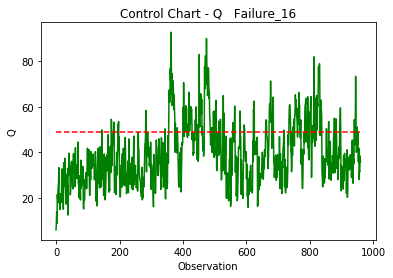

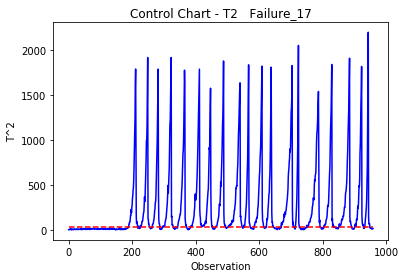

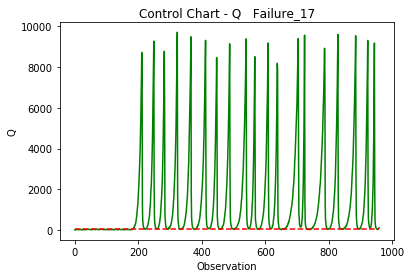

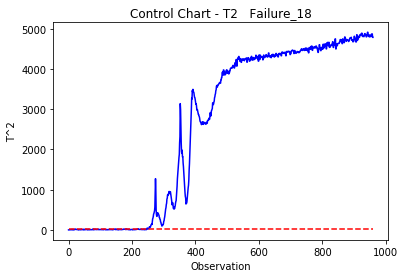

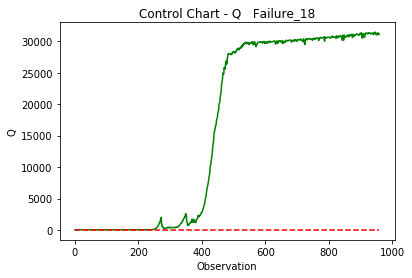

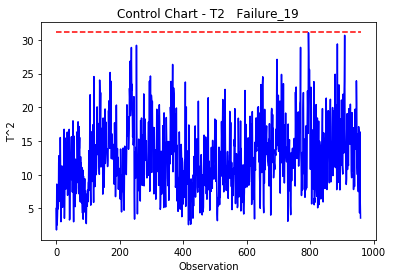

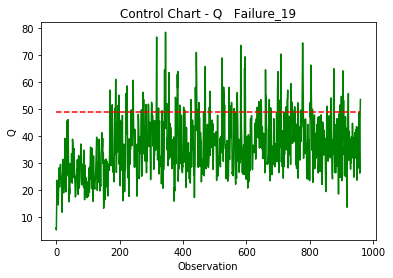

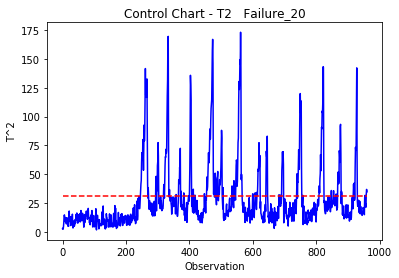

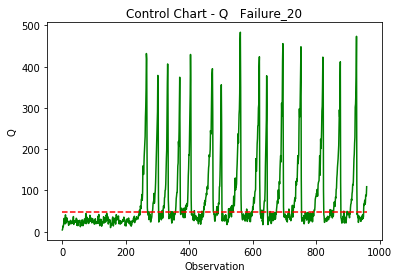

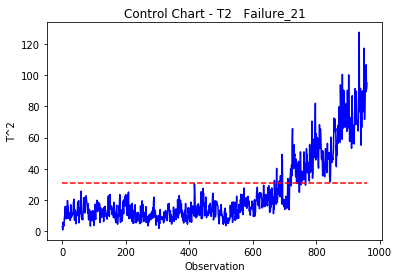

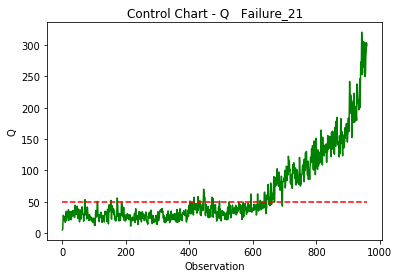

In [20]:
for f in range(0,21):
    
    path2 = files[f] 
    fault_file = np.loadtxt(path2)

    if np.shape(fault_file)[0] < np.shape(fault_file)[1]:
        fault_file = np.transpose(fault_file)
    
    #Normalizing Data
    fault_file_norm = fault_file.copy()

    for i in pd.DataFrame(fault_file_norm):
        pd.DataFrame(fault_file_norm)[i] = (pd.DataFrame(fault_file_norm)[i] - averages[i])/desv_pad[i]
    
    
    #Building the Main Components
    fault_pca = np.dot(fault_file_norm , auto_vet_matx)
    
    #Calculating T2
    fault_T2_matx = pd.DataFrame(fault_pca).apply(el2)

    for i in fault_T2_matx :
        fault_T2_matx[i] = fault_T2_matx[i]/auto_val[i]
       
    #Calculations of T2
    fault_T2 = np.array(fault_T2_matx.sum(axis=1))
    fault_Hotlling = pd.DataFrame(fault_T2, columns=['Fault_T2'])
    fault_Hotlling['T2 - UCL'] = T2_UCL
    data_base_T2 += [fault_T2]
    
    
    ##Detection Speed Analysis 
    #Detection Criteria => 6 consecutive points above the control limit
    
    for i in range(0,np.shape(fault_T2)[0]):
        if i > (np.shape(fault_T2)[0] - 6):
            break
    
        if ((fault_T2[i] >  T2_UCL) and (fault_T2[i+1] >  T2_UCL) and (fault_T2[i+2] >  T2_UCL) and (fault_T2[i+3] >  T2_UCL) and (fault_T2[i+4] >  T2_UCL) and (fault_T2[i+5] >  T2_UCL)):
            detect_T2 += [[i+1 , failures[f]]]
            break 
    
    
    ##Calculations of Q
    #Calculation of the estimated X* Matrix of the failure
    fault_X_est = np.dot(fault_pca, np.transpose(auto_vet_matx))
    
    
    #Failure R Residues
    fault_R = fault_file_norm - fault_X_est
    
    
    #Calculations of Q on a Failure
    Q = np.diag(np.dot(fault_R,np.transpose(fault_R)))
    fault_Q_Chart = pd.DataFrame(Q, columns=['Q'])
    fault_Q_Chart['Q - UCL'] = Q_UCL
    data_base_Q += [Q]
    

    ##Detection Speed Analysis 
    #Detection Criteria => 6 consecutive points above the control limit
    
    for i in range(0,np.shape(Q)[0]):
        if i > (np.shape(Q)[0] - 6):
            break
    
        if ((Q[i] > Q_UCL) and (Q[i+1] > Q_UCL) and (Q[i+2] > Q_UCL) and (Q[i+3] > Q_UCL) and (Q[i+4] > Q_UCL) and (Q[i+5] > Q_UCL)):
            detect_Q += [[i+1 , failures[f]]]
            break 

    
    ##Building the chart T2
    fault_chart_T2 = fault_Hotlling.plot.line(style=['-','--'], color=['b','r'], legend = False)
    plt.setp(fault_chart_T2, xlabel = 'Observation', ylabel = 'T^2', title = ('Control Chart - T2   ' + failures[f]))

    #Saving the chart T2
    chart_T2 = failures[f] + ' - T2'
    plt.savefig(chart_T2)


    ##Building the chart Q
    fault_chart_Q = fault_Q_Chart.plot.line(style=['-','--'], color=['g','r'], legend = False)
    plt.setp(fault_chart_Q, xlabel = 'Observation', ylabel = 'Q', title = ('Control Chart - Q   ' + failures[f]))

    #Saving the chart Q
    chart_Q = failures[f] + ' - Q'
    plt.savefig(chart_Q)

## Calculation of MDR

In [21]:
#Database partition after failure (t = 160)
#Consideration: if the fault occurs at t = 160, it must be detected at t = 161.
#Therefore, the partition of the array occurs in column 160, 
#which corresponds to the 161st observation, and not in column 159

data_base_T2 = np.array(data_base_T2)[ : , 160:]
data_base_Q = np.array(data_base_Q)[ : , 160:]

In [22]:
pd.DataFrame(data_base_T2)

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,(14.355470830862036+0j),(20.009989645112828+0j),(11.195623528484468+0j),(14.620599200014263+0j),(20.51736009586412+0j),(22.725909000266704+0j),(51.98503006547338+0j),(62.76483388246419+0j),(134.42501455830484+0j),(138.2642801105251+0j),...,(287.62792774903767+0j),(295.69653641224363+0j),(226.8290116274844+0j),(223.5933878796624+0j),(277.60622528794374+0j),(304.5876143608009+0j),(284.90040387365787+0j),(288.3363771694051+0j),(301.28973099492055+0j),(310.6855581737678+0j)
1,(8.22558098096903+0j),(12.241434636675931+0j),(7.439378777043604+0j),(8.314546153563908+0j),(14.935312385196221+0j),(11.108420471058238+0j),(11.960298302118504+0j),(11.69484556509296+0j),(16.15127068339416+0j),(11.649230544287285+0j),...,(1321.3935386021724+0j),(1346.7508885789998+0j),(1339.679727426559+0j),(1326.4579728007388+0j),(1312.3468749315089+0j),(1278.2701927123296+0j),(1281.8915887164985+0j),(1280.3728049822764+0j),(1426.8303740926617+0j),(1426.7696662445576+0j)
2,(12.136158672206895+0j),(13.65969691909496+0j),(15.176175783948432+0j),(19.47914232916111+0j),(14.141627097614402+0j),(11.136021252707165+0j),(19.80172260311476+0j),(9.2911803296868+0j),(17.568450888838655+0j),(19.699306213997893+0j),...,(12.163356741507439+0j),(12.392504586713127+0j),(11.157633175431146+0j),(8.405625977615532+0j),(16.266706852364333+0j),(20.315118434714613+0j),(21.23435448885448+0j),(18.404977441921822+0j),(22.373993098433658+0j),(16.19109534163643+0j)
3,(40.471173402726095+0j),(16.554434041146642+0j),(24.04298634492865+0j),(34.50280535996089+0j),(9.87205162006112+0j),(17.12331570106297+0j),(12.050266345222012+0j),(20.019229123636443+0j),(20.48667377780687+0j),(18.353370390792307+0j),...,(10.074657043380807+0j),(12.137662824585655+0j),(9.381402730919806+0j),(13.565939008079418+0j),(21.172488373300073+0j),(14.164246808434616+0j),(12.907758032450062+0j),(10.048076268222964+0j),(11.429006266800613+0j),(14.396920860260769+0j)
4,(42.6205281998036+0j),(89.96891903985522+0j),(99.64191462170739+0j),(91.94874229251428+0j),(24.84788939370013+0j),(14.68958803786076+0j),(18.390814870398792+0j),(17.963488799454524+0j),(27.702435975318856+0j),(17.48073670186151+0j),...,(7.085184598769698+0j),(7.083313798753801+0j),(5.839978559668298+0j),(6.2103253714737+0j),(8.98764666820365+0j),(8.399656312185058+0j),(10.160608173879439+0j),(7.649721366658589+0j),(7.237490525491543+0j),(11.456331777229227+0j)
5,(10.782444160633425+0j),(13.180320611293261+0j),(11.725889743678403+0j),(16.376568638333154+0j),(18.225397073838316+0j),(23.52939887106143+0j),(27.32119664819078+0j),(28.314779810999696+0j),(29.252400973865175+0j),(39.95302045037302+0j),...,(5701.826342460856+0j),(5703.65472789289+0j),(5743.717385197226+0j),(5745.551128954786+0j),(5653.790614185693+0j),(5669.061861128334+0j),(5730.750000415909+0j),(5732.618053050488+0j),(5681.701082861686+0j),(5683.555061227518+0j)
6,(122.39786462274682+0j),(144.97256210171366+0j),(177.64110423934545+0j),(163.43358854426376+0j),(211.4014079182711+0j),(220.3452467162728+0j),(264.51372396222564+0j),(258.11919777063355+0j),(369.2879335918283+0j),(405.6821568667699+0j),...,(24.564207119856324+0j),(26.00069921670671+0j),(36.813859306328325+0j),(44.76001510425799+0j),(45.03559561138175+0j),(40.02601254128306+0j),(20.282567192047715+0j),(29.979128261786983+0j),(27.051391356368345+0j),(32.15161326550113+0j)
7,(15.938743919810825+0j),(10.021460829177125+0j),(9.939545677277682+0j),(12.209681549879814+0j),(10.44300635877708+0j),(13.037849053653941+0j),(16.436934424953396+0j),(21.0558719886041+0j),(13.46204008921309+0j),(25.318678389649826+0j),...,(308.36155891468763+0j),(312.2188963767034+0j),(393.13911111795886+0j),(396.8578796566044+0j),(429.2501517880621+0j),(443.41685457331874+0j),(463.83287003600776+0j),(450.78446371337367+0j),(458.6829538940723+0j),(452.77183078717405+0j)
8,(21.43153459660366+0j),(16.85392720505193+0j),(27.446994388493025+0j),(20.332055468385338+0j),(25.44371282307104+0j),(30.3204151

In [23]:
#Calculations for the Statistics of T2
MDR_T2 = []

for row in data_base_T2:
    count_T2 = 0
    
    for column in row:
        if column < T2_UCL:
            count_T2 += 1
            
    MDR_T2 += [count_T2/800]
MDR_T2 = np.array(MDR_T2)
    
#Calculations for the Statistics of Q
MDR_Q = []

for row in data_base_Q:
    count_Q = 0
    
    for j in row: 
        if j < Q_UCL: 
            count_Q += 1
            
    MDR_Q += [count_Q/800]
MDR_Q = np.array(MDR_Q)

#Benchmarking the Data
MDR_T2_Bench = np.array([0.008,0.020,0.998,0.956,0.775,0.011,0.085,
                0.034,0.994,0.666,0.794,0.029,0.060,0.158,
                0.988,0.834,0.259,0.113,0.996,0.701,0.736])
MDR_Q_Bench = np.array([0.003,0.014,0.991,0.038,0.746,0,0,
              0.024,0.981,0.659,0.356,0.025,0.045,0,
              0.973,0.755,0.108,0.101,0.873,0.550,0.570])

In [24]:
#Difference in Delta Statistics = LOP - Bench
Delta_MDR_T2 = MDR_T2 - MDR_T2_Bench
Delta_MDR_Q = MDR_Q - MDR_Q_Bench

In [25]:
#Validation Table
Validation = pd.DataFrame([MDR_T2,MDR_Q,MDR_T2_Bench,MDR_Q_Bench,Delta_MDR_T2,Delta_MDR_Q], index = ['T2','Q', 'T2 - Bench', 'Q - Bench', 'Delta - T2', 'Delta - Q']).T

In [26]:
Validation

,T2,Q,T2 - Bench,Q - Bench,Delta - T2,Delta - Q
0,0.00750,0.00250,0.008,0.003,-0.00050,-0.00050
1,0.02000,0.01375,0.020,0.014,0.00000,-0.00025
2,0.99875,0.99000,0.998,0.991,0.00075,-0.00100
3,0.96125,0.03625,0.956,0.038,0.00525,-0.00175
4,0.77375,0.74500,0.775,0.746,-0.00125,-0.00100
5,0.01125,0.00000,0.011,0.000,0.00025,0.00000
6,0.07750,0.00000,0.085,0.000,-0.00750,0.00000
7,0.03250,0.02500,0.034,0.024,-0.00150,0.00100
8,0.99750,0.98000,0.994,0.981,0.00350,-0.00100
9,0.65000,0.64625,0.666,0.659,-0.01600,-0.01275


## Detection Speed Analysis

In [27]:
#Organization of the Detection Lists so that the faults 
#that were not detected are included in the data list

for fault in failures:
    
    if fault not in np.transpose(np.array(detect_Q)[:,1:]):  
        detect_Q += [['Not detected' , fault]]
        

for fault in failures:
    
    if fault not in np.transpose(np.array(detect_T2)[:,1:]):
        detect_T2 += [['Not detected' , fault]]

In [28]:
#Creating data matrices and sorting values with respect to failure order
detect_Q = pd.DataFrame(detect_Q, columns = ['Detection - Q', 'Failure']).sort_values(by='Failure')
detect_T2 = pd.DataFrame(detect_T2, columns = ['Detection - T2', 'Failure']).sort_values(by='Failure')

In [29]:
#Determines the "Failure" -column as indexes for Q
detect_Q.set_index('Failure', inplace=True)

In [30]:
#Determining the "Failure" -column as indexes for T2
detect_T2.set_index('Failure', inplace=True)

In [31]:
#Combining the detection data frames based on indexes
detect_T2.join(detect_Q)

,Detection - T2,Detection - Q
Failure,,
Failure_01,167,163
Failure_02,177,172
Failure_03,Not detected,Not detected
Failure_04,Not detected,165
Failure_05,173,162
Failure_06,170,161
Failure_07,161,161
Failure_08,183,182
Failure_09,Not detected,Not detected
